In [22]:
import hdbscan
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons


In [10]:
# make_moons : 달 모양 군집 생성
# make_blobs : 원 모양 군집 생성
# centers 옵션으로 중심점 지정 
# cluster_std 옵션으로 분포도 지정 
moons, _ = make_moons(n_samples=100, noise=0.05) 
blobs1, _ = make_blobs(n_samples=50, centers=[(-0.75, 2.25), (1.0, 2.0)], cluster_std=0.25) 
blobs2, _ = make_blobs(n_samples=30, centers=[(-0.3, -1), (4.0, 1.5)], cluster_std=0.3) 
blobs3, _ = make_blobs(n_samples=100, centers=[(3, -1), (4.0, 1.5)], cluster_std=0.4) 

# 데이터를 하나로 합치기 
hdb_data = np.vstack([moons, blobs1, blobs2, blobs3]) 
hdb_data_df = pd.DataFrame(hdb_data, columns=['x', 'y']) 
hdb_data_df.head()

,x,y
0,-0.307023,0.941777
1,-0.042539,0.409779
2,-0.985080,0.314102
3,0.230060,0.995136
4,0.369477,0.954924


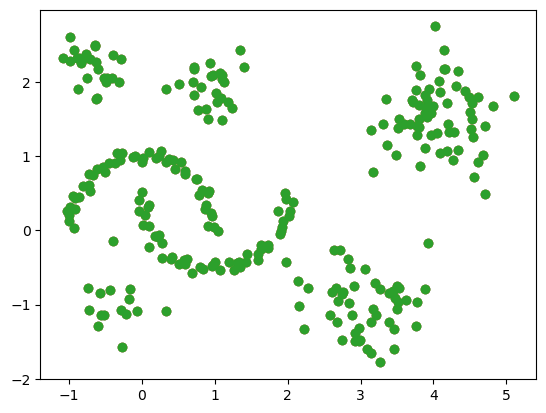

In [23]:
# scatter plot 그리기 
plt.scatter(hdb_data_df['x'], hdb_data_df['y'])
plt.show()

In [24]:
hdbscan_model = hdbscan.HDBSCAN(min_cluster_size=5) 
hdbscan_model.fit(hdb_data)

# 훈련된 결과 label 확인 
hdbscan_label = hdbscan_model.fit_predict(hdb_data) 
set(hdbscan_label) # {-1, 0, 1, 2, 3, 4, 5, 6}

{-1, 0, 1, 2, 3, 4, 5, 6}

C:\Users\EunHye\anaconda3\envs\home_py\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



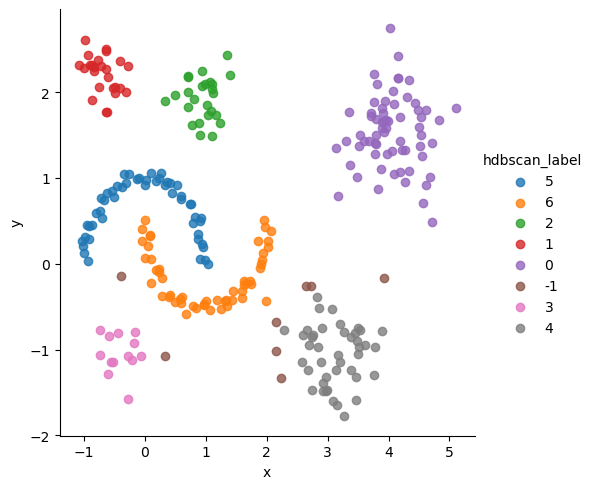

In [27]:
# 훈련 결과를 plotly를 사용하여 시각화
hdb_data_df['hdbscan_label'] = hdbscan_label 
hdb_data_df['hdbscan_label'] = hdb_data_df['hdbscan_label'].astype(str) 


sns.lmplot('x', 'y', data=hdb_data_df, hue='hdbscan_label', fit_reg=False)
plt.show()


C:\Users\EunHye\anaconda3\envs\home_py\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



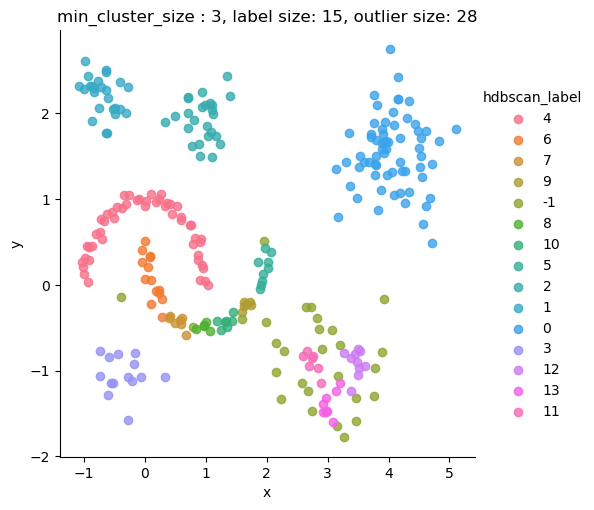

C:\Users\EunHye\anaconda3\envs\home_py\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



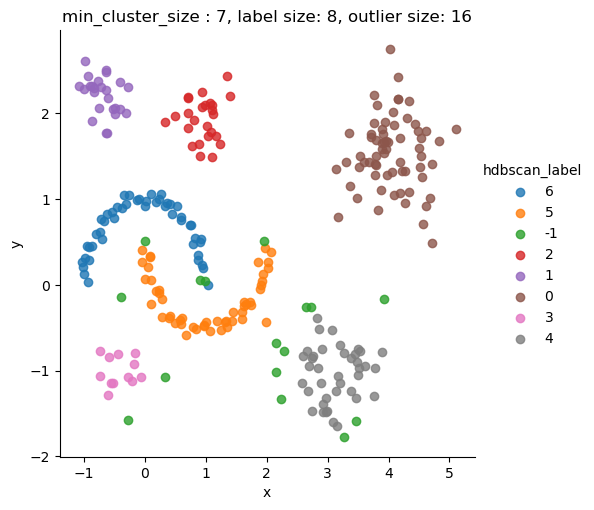

C:\Users\EunHye\anaconda3\envs\home_py\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



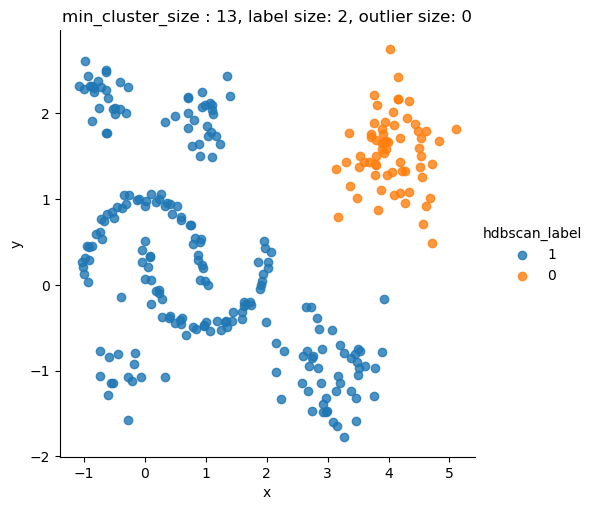

In [57]:
# min_cluster_size에 따른 clusters의 차이 비교 
for mcn in [3,7,13]: #
    hdbscan_label = hdbscan.HDBSCAN(min_cluster_size=mcn, min_samples=None, prediction_data=True).fit_predict(hdb_data) 
    hdb_data_df['hdbscan_label'] = hdbscan_label 
    hdb_data_df['hdbscan_label'] = hdb_data_df['hdbscan_label'].astype(str) 
    hdbscan_case_dict = dict((x, list(hdbscan_label).count(x)) for x in set(hdbscan_label)) 
    if -1 in hdbscan_case_dict.keys(): 
        outliers = hdbscan_case_dict[-1] 
    else: # outlier가 없는 경우 
        outliers = 0 
        
    sns.lmplot('x', 'y', data=hdb_data_df, hue='hdbscan_label', fit_reg=False)
    ax = plt.gca()
    ax.set_title("min_cluster_size : "+ str(mcn)+ ", label size: "+ str(len(hdbscan_case_dict)) + ", outlier size: "+ str(outliers))
    plt.show()

C:\Users\EunHye\anaconda3\envs\home_py\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



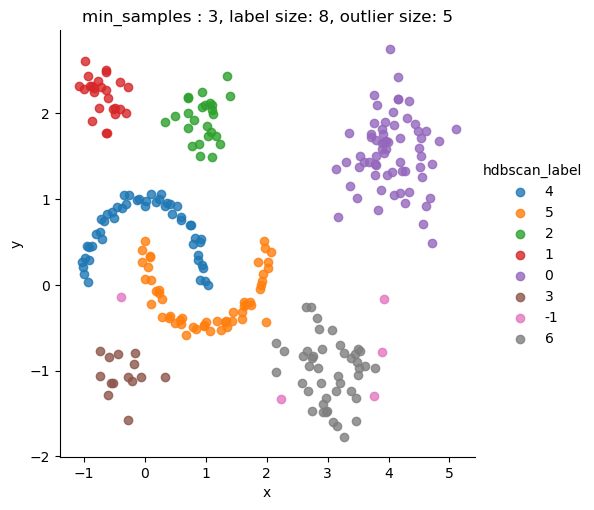

C:\Users\EunHye\anaconda3\envs\home_py\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



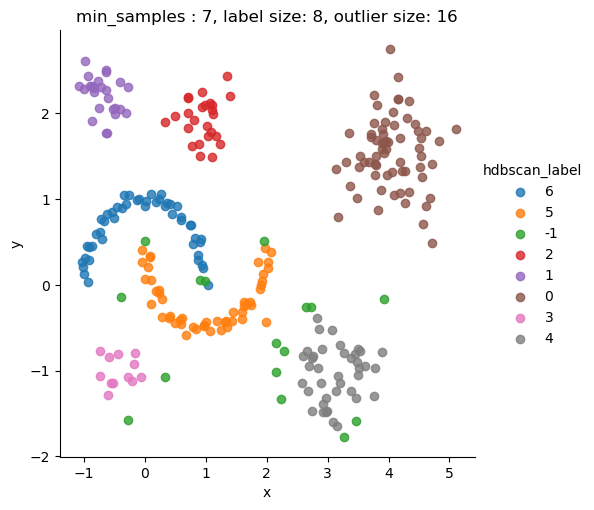

C:\Users\EunHye\anaconda3\envs\home_py\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



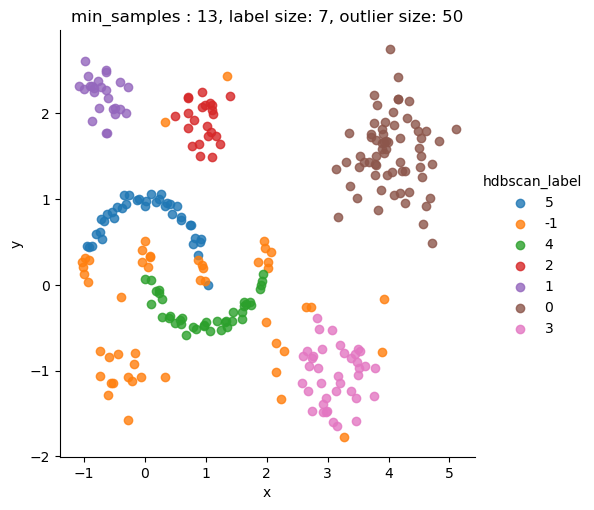

In [59]:
# min_cluster_size에 따른 clusters의 차이 비교 
for mcn in [3,7,13]: #
    hdbscan_label = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=mcn, prediction_data=True).fit_predict(hdb_data) 
    hdb_data_df['hdbscan_label'] = hdbscan_label 
    hdb_data_df['hdbscan_label'] = hdb_data_df['hdbscan_label'].astype(str) 
    hdbscan_case_dict = dict((x, list(hdbscan_label).count(x)) for x in set(hdbscan_label)) 
    if -1 in hdbscan_case_dict.keys(): 
        outliers = hdbscan_case_dict[-1] 
    else: # outlier가 없는 경우 
        outliers = 0 
        
    sns.lmplot('x', 'y', data=hdb_data_df, hue='hdbscan_label', fit_reg=False)
    ax = plt.gca()
    ax.set_title("min_samples : "+ str(mcn)+ ", label size: "+ str(len(hdbscan_case_dict)) + ", outlier size: "+ str(outliers))
    plt.show()

C:\Users\EunHye\anaconda3\envs\home_py\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



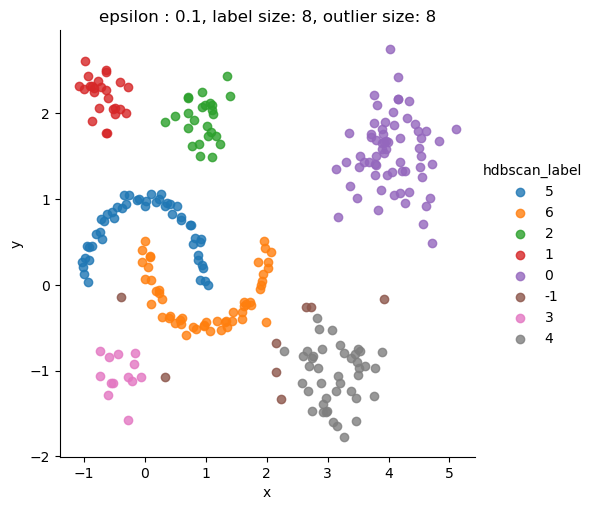

C:\Users\EunHye\anaconda3\envs\home_py\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



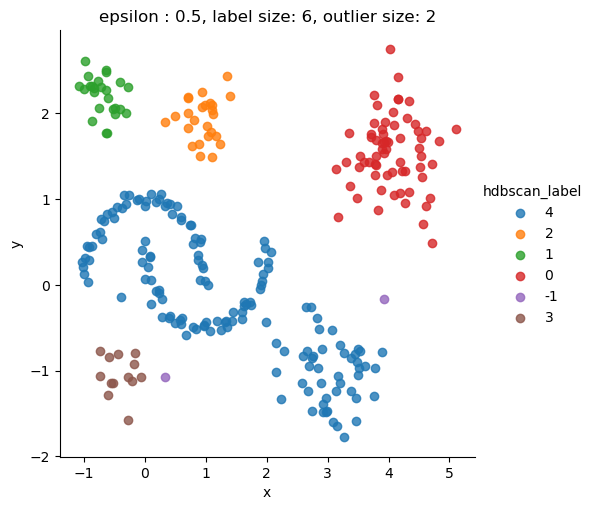

C:\Users\EunHye\anaconda3\envs\home_py\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



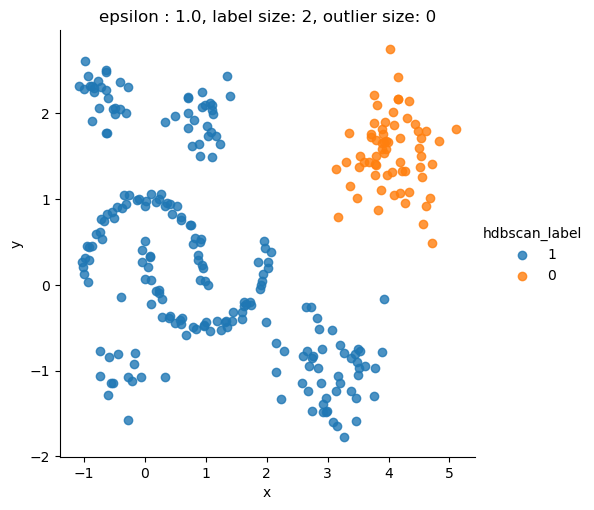

In [60]:
# min_cluster_size에 따른 clusters의 차이 비교 
for mcn in [0.1, 0.5, 1.0]: #
    hdbscan_label = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=None, cluster_selection_epsilon=mcn, prediction_data=True).fit_predict(hdb_data) 
    hdb_data_df['hdbscan_label'] = hdbscan_label 
    hdb_data_df['hdbscan_label'] = hdb_data_df['hdbscan_label'].astype(str) 
    hdbscan_case_dict = dict((x, list(hdbscan_label).count(x)) for x in set(hdbscan_label)) 
    if -1 in hdbscan_case_dict.keys(): 
        outliers = hdbscan_case_dict[-1] 
    else: # outlier가 없는 경우 
        outliers = 0 
        
    sns.lmplot('x', 'y', data=hdb_data_df, hue='hdbscan_label', fit_reg=False)
    ax = plt.gca()
    ax.set_title("epsilon : "+ str(mcn)+ ", label size: "+ str(len(hdbscan_case_dict)) + ", outlier size: "+ str(outliers))
    plt.show()

C:\Users\EunHye\anaconda3\envs\home_py\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



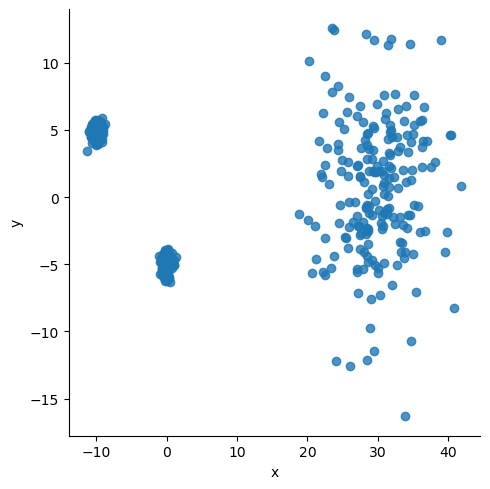

In [63]:
# HDBSCAN와 DBSCAN을 비교할 분산이 극단적인 두가지 케이스의 데이터 생성 
blobs1, _ = make_blobs(n_samples=200, centers=[(-10, 5), (0, -5)], cluster_std=0.5) 
blobs2, _ = make_blobs(n_samples=200, centers=[(30, -1), (30, 1.5)], cluster_std=5.0) 

comp_data = np.vstack([blobs1, blobs2]) 
comp_data_df = pd.DataFrame(comp_data, columns=['x', 'y']) 
comp_data_df.head()


sns.lmplot('x', 'y', data=comp_data_df, fit_reg=False)
plt.show()

In [69]:
# dbscan 훈련 
dbscan_model = DBSCAN().fit(comp_data) 
comp_data_df["dbscan_label"] = dbscan_model.labels_ 
comp_data_df["dbscan_label"] = comp_data_df["dbscan_label"].astype(str) 

# hdbscan 훈련 
hdbscan_lables = hdbscan.HDBSCAN().fit_predict(comp_data) 
comp_data_df["hdbscan_label"] = hdbscan_lables 
comp_data_df["hdbscan_label"] = comp_data_df["hdbscan_label"].astype(str)

In [70]:
# outlier를 구분하기 위한 color 컬럼 생성 
color_dict = {"-1":"#d8d8d8", "0":"#ff5e5b", "1":"#457b9d", "2":"#00cecb", "3":"#FFED66"} 
comp_data_df['dbscan_label_color'] = comp_data_df['dbscan_label'].map(color_dict) 
comp_data_df['hdbscan_label_color'] = comp_data_df['hdbscan_label'].map(color_dict)

C:\Users\EunHye\anaconda3\envs\home_py\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



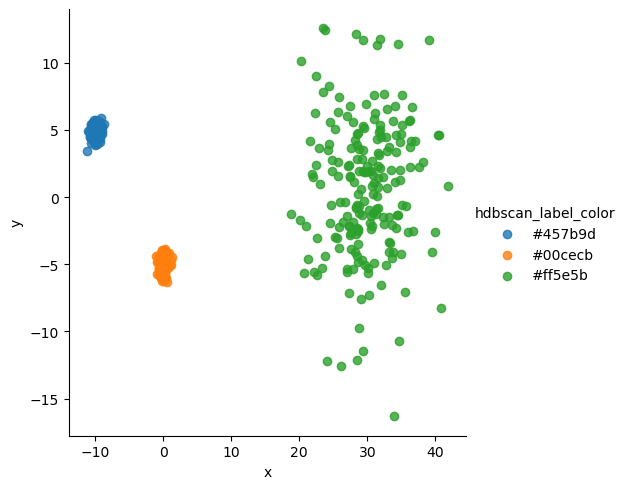

C:\Users\EunHye\anaconda3\envs\home_py\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



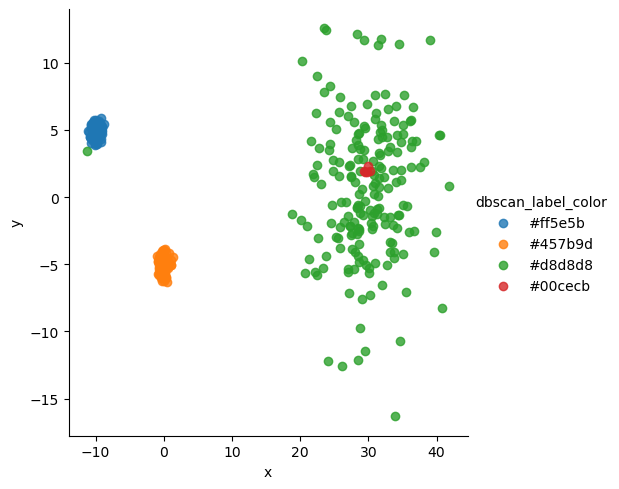

In [71]:
# 두 모델 결과를 시각화로 나타내고 차이가 나타나는지 확인 
for label_case in ['hdbscan_label_color', 'dbscan_label_color']: 
    
    sns.lmplot('x', 'y', data=comp_data_df, hue = label_case, fit_reg=False)
    plt.show()


## HDBSCAN을 DBSCAN과 함께 사용하기(cluster_selection_epsilon 파라미터)
- 주어진 cluster_selection_epilon 거리를 활용하여 DBSCAN 수행 후, 나머지 데이터에 대해서 HDBSCAN을 수행
- 이렇게 하면 원하는 만큼의 밀집도를 가지는 데이터는 하나의 클러스터에 묶이는 것을 보장할 수 있다. 

In [ ]:
X = np.radians(coordinates)
earth_radius_km = 6371
epsilon = 0.005/earth_radius_km # clacualte 5 meter epsilon threshold

clusterer = hdbscan.HDBSCAN(min_cluster_size=4, metric = 'haversine', cluster_selection_epsilon= epsilon, 
                            cluster_selection_method='eom')
clusterer.fit(X)